I will apply various advanced filtering techniques (low-pass, high-pass, band-pass, notch filters) to the seismic data to clean up noise or isolate specific signal features.

In [2]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

#Defining types of filters
'#**to isolate a seismic wave band, like body waves or surface waves. Only allows frequencies between lowcut and highcut**'

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a
    
'**Creates a low-pass filter: keeps frequencies below cutoff.'
'#Removes high-frequency noise or focus on long-period seismic signals.**'
    
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low')
    return b, a

'creates a high-pass filter: keeps frequencies above cutoff. Removes baseline drift or long-period noise.'
    
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high')
    return b, a
    
'''Creates a notch filter (aka band-stop) centered at f0.
Suppresses one frequency band (like electrical hum at 50 or 60 Hz).
Remove powerline noise or a known unwanted frequency.
True notch filters are better handled with iirnotch() from scipy.signal for precise narrow band-stop filtering. 
This current one is a wider bandstop depending on the order.'''


def butter_notch(f0, fs, Q=30, order=5):
    nyquist = 0.5 * fs
    w0 = f0 / nyquist
    b, a = butter(order, w0, btype='bandstop')
    return b, a


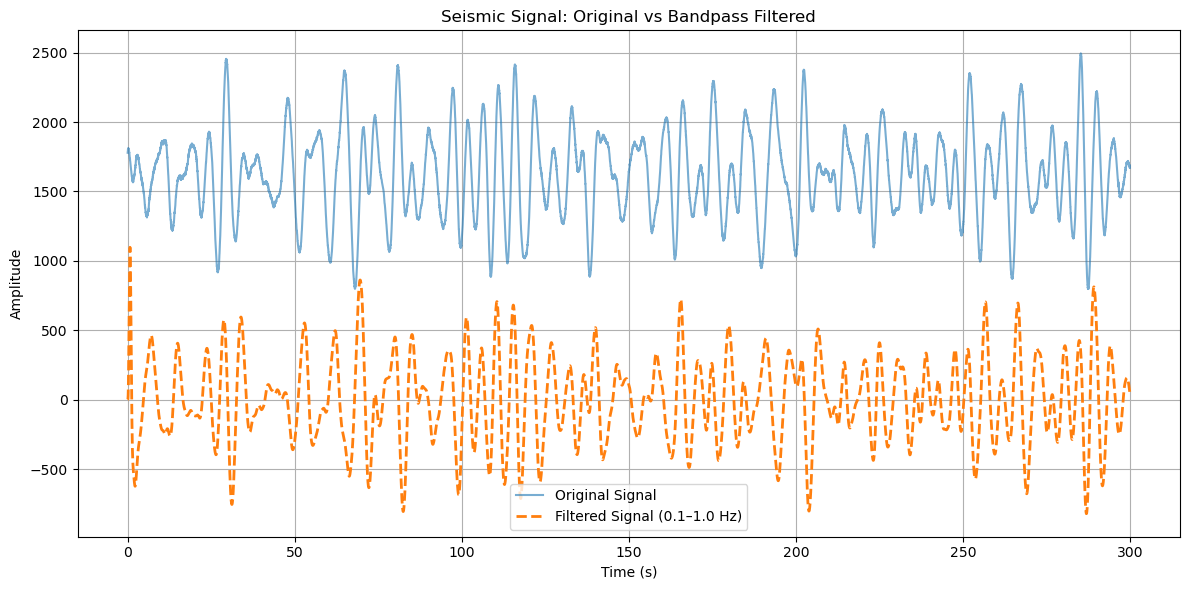

In [7]:
#applying a bandpass filter
#Filter parameters
# === Imports ===
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.filter import bandpass
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import numpy as np

# === Define bandpass filter ===
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# === Download real waveform data ===
client = Client("IRIS")
starttime = UTCDateTime("2020-01-01T00:00:00")
endtime = starttime + 5 * 60  # 5 minutes
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BHZ",
                          starttime=starttime, endtime=endtime)

# === Extract trace ===
tr = st[0]
fs = tr.stats.sampling_rate  # Sampling rate of the trace
lowcut = 0.1  # Hz
highcut = 1.0  # Hz

# === Apply custom band-pass filter ===
b, a = butter_bandpass(lowcut, highcut, fs, order=4)
filtered_data = lfilter(b, a, tr.data)

# === Plot original and filtered waveform ===
plt.figure(figsize=(12, 6))
plt.plot(tr.times(), tr.data, label="Original Signal", alpha=0.6)
plt.plot(tr.times(), filtered_data, label="Filtered Signal (0.1–1.0 Hz)", linestyle='--', linewidth=2)
plt.legend()
plt.title("Seismic Signal: Original vs Bandpass Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
